In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

### Reading the Data

In [3]:
train_df = pd.read_csv("sign_mnist_train.csv")
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
test_df = pd.read_csv("sign_mnist_test.csv")
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


### Preprocessing the Data

In [5]:
train_df.loc[train_df["label"] >= 10,["label"]] -= 1
test_df.loc[test_df["label"] >= 10,["label"]] -= 1

In [6]:
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

### Class Distribution

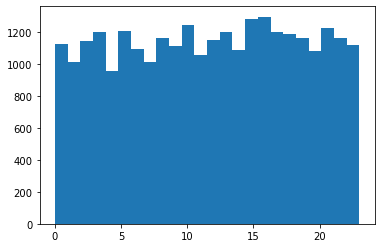

In [7]:
histo = plt.hist(train_df["label"],bins=24)
plt.show()

In [8]:
histo[0].mean(), histo[0].std(), histo[0].max(), histo[0].min()

(1143.9583333333333, 81.99516203546537, 1294.0, 957.0)

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(train_df.iloc[:,1:])
x_train = x_train.reshape(train_df.shape[0],28,28,1)
y_train = train_df["label"].to_numpy()

In [10]:
x_test = scaler.fit_transform(test_df.iloc[:,1:])
x_test = x_test.reshape(test_df.shape[0],28,28,1)
y_test = test_df["label"].to_numpy()

### Model

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(24))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

In [13]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
858/858 [==============================] - 19s 21ms/step - loss: 1.4511 - accuracy: 0.5308 - val_loss: 0.8460 - val_accuracy: 0.7091
Epoch 2/10
858/858 [==============================] - 18s 21ms/step - loss: 0.2595 - accuracy: 0.9163 - val_loss: 0.7567 - val_accuracy: 0.7662
Epoch 3/10
858/858 [==============================] - 18s 21ms/step - loss: 0.0747 - accuracy: 0.9795 - val_loss: 0.8712 - val_accuracy: 0.7960
Epoch 4/10
858/858 [==============================] - 18s 21ms/step - loss: 0.0336 - accuracy: 0.9917 - val_loss: 0.8396 - val_accuracy: 0.8201
Epoch 5/10
858/858 [==============================] - 18s 21ms/step - loss: 0.0370 - accuracy: 0.9902 - val_loss: 0.8570 - val_accuracy: 0.7963
Epoch 6/10
858/858 [==============================] - 19s 22ms/step - loss: 0.0279 - accuracy: 0.9915 - val_loss: 0.7173 - val_accuracy: 0.8402
Epoch 7/10
858/858 [==============================] - 20s 23ms/step - loss: 0.0163 - accuracy: 0.9950 - val_loss: 0.6670 - val_accuracy:

225/225 - 1s - loss: 0.6971 - accuracy: 0.8827


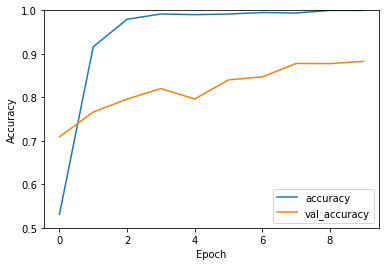

In [14]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [18]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test))

Epoch 1/10
858/858 [==============================] - 18s 20ms/step - loss: 0.0101 - accuracy: 0.9972 - val_loss: 0.6933 - val_accuracy: 0.8936
Epoch 2/10
858/858 [==============================] - 17s 20ms/step - loss: 1.1746e-04 - accuracy: 1.0000 - val_loss: 0.7505 - val_accuracy: 0.8896
Epoch 3/10
858/858 [==============================] - 17s 20ms/step - loss: 5.8236e-05 - accuracy: 1.0000 - val_loss: 0.7660 - val_accuracy: 0.8900
Epoch 4/10
858/858 [==============================] - 18s 21ms/step - loss: 0.0357 - accuracy: 0.9897 - val_loss: 0.5602 - val_accuracy: 0.8834
Epoch 5/10
858/858 [==============================] - 17s 19ms/step - loss: 0.0066 - accuracy: 0.9984 - val_loss: 0.6358 - val_accuracy: 0.8726
Epoch 6/10
858/858 [==============================] - 16s 19ms/step - loss: 2.7411e-04 - accuracy: 1.0000 - val_loss: 0.7194 - val_accuracy: 0.8804
Epoch 7/10
858/858 [==============================] - 16s 19ms/step - loss: 9.4315e-05 - accuracy: 1.0000 - val_loss: 0.7158

225/225 - 1s - loss: 0.7939 - accuracy: 0.8868


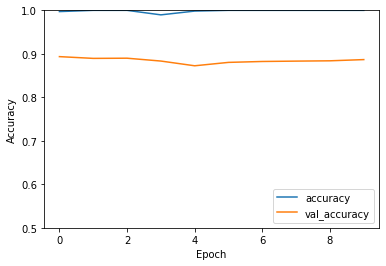

In [19]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

--------------
The model predicted this instance as label 22
--------------
Where its label is 22


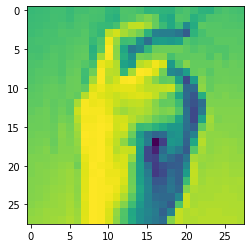

In [15]:
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.pyplot import imshow
instance = 689

imshow(np.asarray(x_test[instance].reshape(28,28)))
print("--------------")
print("The model predicted this instance as label", model.predict(x_test[instance:instance+1])[0].argmax())
print("--------------")
print("Where its label is", y_test[instance])

In [ ]:
from sklearn.metrics import classification_report
pred = [x.argmax() for x in model.predict(x_test)]
print(classification_report(y_test.to_numpy(), pred))